### 1. Efficient Python programming for lists of same-type objects:

a) Find an efficient way to determine the mean and the position of minimum and maximum values in a long list of random numbers.

In [ ]:
# Each of these are easily computed in O(n) time by a linear scan over the list
def mean(lst):
  s = 0
  for x in lst:
    s += x
  return s / len(lst)

def minimum_index(lst):
  min_i = 0
  for i in range(len(lst)):
    if lst[i] < lst[min_i]:
      min_i = i
  return min_i

def maximum_index(lst):
  max_i = 0
  for i in range(len(lst)):
    if lst[i] > lst[max_i]:
      max_i = i
  return max_i

b) Given $N$ random numbers $a_j$, evenly distributed between $-1$ and $1$, find an efficient way to obtain regularized numbers $x_j$ given by $x_j = \bar{a} + \sigma$ for $a_j > \bar{a} + \sigma$; $x_j = \bar{a} - \sigma$ for $a_j < \bar{a} - \sigma$; $x_j = a_j$ else. Here, $\bar{a}$ is the mean value of the sample and $\sigma$ the standard deviation.

In [ ]:
# Compute the standard deviation, also returning the mean to avoid redundant work
def mean_and_std(lst):
  m = mean(lst)
  s = 0
  for x in lst:
    s += (x - m)**2
  s = (s / len(lst))**0.5
  return m, s

# First compute the mean and standard deviation in O(n) time, then do one more scan over the list
def regularized(a):
  m, s = mean_and_std(a)
  x = a
  for j in range(len(a)):
    x[j] = min(m + s, max(m - s, a[j]))
  return x

### 2. The following 2-qubit circuits shall be programmed using 3 different frameworks: i) using QISkit; ii) using Cirq; iii) using Pennylane; For each circuit extract the final state vector (before any measurement) and create a frequency plot from sampling the circuits (measurement of all qubits) 100 times.
* create a circuit with $H$-gate and $Z$-gate acting on the first qubit and $X$-gate and $H$-gate acting on the second qubit;
* create the Bell states $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ and $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$
* create the Bell states $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ and $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

### Qiskit

In [8]:
# TODO Qiskit
import qiskit
from qiskit import QuantumCircuit
from qiskit_aer import Aer, AerSimulator

backend_v = Aer.get_backend('statevector_simulator') 

In [ ]:
# Create function to extract staebector, create frequency plot fro sampling circuits
# TODO

#### Create a circuit with $H$-gate and $Z$-gate acting on the first qubit and $X$-gate and $H$-gate acting on the second qubit;

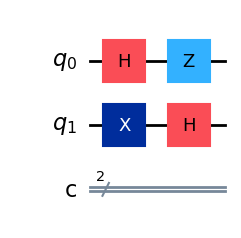

In [15]:
qc = QuantumCircuit(2,2)   # arguments: qubits,classical_bits
qc.h(0)  # hadamard on qubit 0
qc.z(0)  # z gate on qubit 0
qc.x(1)  # hadamard on qubit 1
qc.h(1)  # z gate on qubit 0
# qc.measure([0,1],[0,1])  # measure qubits 0 and 1 and store the result in classical bits 0 and 1

# display the circuit
qc.draw(output='mpl')

In [17]:
# Get state vector
psi = backend_v.run(qc).result().get_statevector()
print(psi)

# Need to measure after getting the state vector
qc.measure([0,1],[0,1])  # measure qubits 0 and 1 and store the result in classical bits 0 and 1

## run circuit using the AER simulator and print results (counts) and their probabilities
Nshots = 100
## set attribute "memory=True" to access the result for each individual shot 
job = backend_v.run(qc, shots=Nshots, memory=True).result() 
print(job.get_counts())

Statevector([ 0.5-6.123234e-17j, -0.5+6.123234e-17j, -0.5+6.123234e-17j,
              0.5-6.123234e-17j],
            dims=(2, 2))
{'01': 23, '11': 23, '10': 27, '00': 27}


#### Create the Bell states $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ and $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

##### i) $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

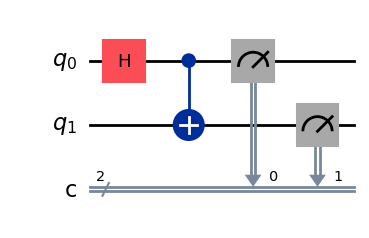

In [13]:
qc = QuantumCircuit(2,2)   # arguments: qubits,classical_bits
qc.h(0)  # hadamard on qubit 0
qc.cx(0,1) # CNOT (also called CX): control is qubit 0, target is qubit 1
qc.measure([0,1],[0,1]) # arguments: list of qubits to measure, list of bits that contain the results

# display the circuit
qc.draw(output='mpl')

In [14]:
# Get state vector
psi = backend_v.run(qc).result().get_statevector() # ?? TODO
print(psi)

## run circuit using the AER simulator and print results (counts) and their probabilities
Nshots = 100
## set attribute "memory=True" to access the result for each individual shot 
job = backend_v.run(qc, shots=Nshots, memory=True).result() 
print(job.get_counts())

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
{'00': 48, '11': 52}


### Criq

In [2]:
# TODO Cirq
import cirq

circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(2)

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.Z(qubits[0]))
circuit.append(cirq.X(qubits[1]))
circuit.append(cirq.H(qubits[1]))

print(circuit)

# Initialize Simulator
cirq_s = cirq.Simulator()

print('Simulate the circuit:')
results = cirq_s.simulate(circuit)
print(results)

In [3]:
# TODO Pennylane
import pennylane as qml

### 3) Using the parametrized QISkit circuit for quantum teleportation, investigate whether any arbitrary payload qubit can be teleported.

First try a few states with complex amplitudes and/or rotation angles and compare the resulting state with the payload state vector.

Then describe mathematically how the state vector of the system evolves from the Bell state $|q_Aq_B\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ and arbitrary payload state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ to the final state; argue why Bob has to apply $X$ and $Z$ gates depending on the outcome of Alice's measurements of her qubits.

In [ ]:
# TODO